In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, random_state=42)


In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Linear SVM ---
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
print(f"Linear SVM Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")

Linear SVM Accuracy: 0.82


In [4]:
rbf_svm = SVC(kernel='rbf', gamma=0.7, C=1.0)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
print(f"Non-linear (RBF) SVM Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")

Non-linear (RBF) SVM Accuracy: 0.83


In [5]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

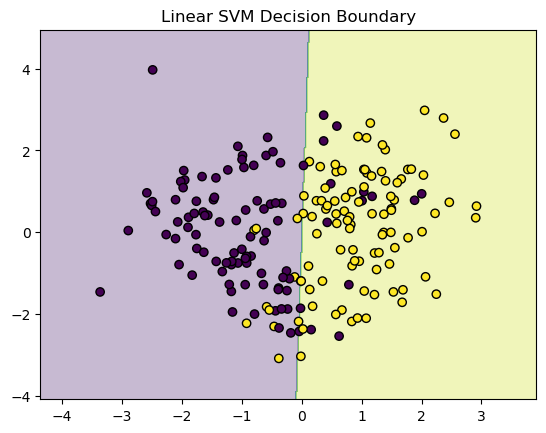

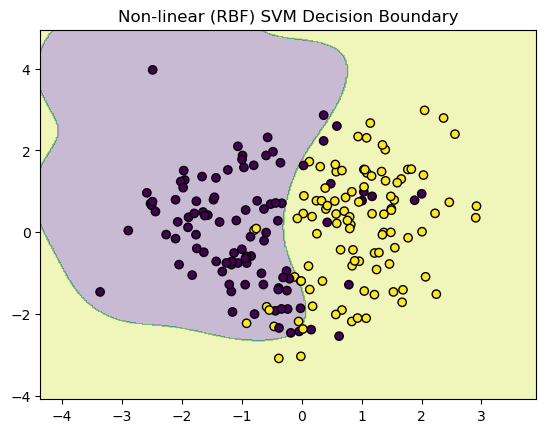

In [6]:
plot_decision_boundary(linear_svm, X, y, "Linear SVM Decision Boundary")
plot_decision_boundary(rbf_svm, X, y, "Non-linear (RBF) SVM Decision Boundary")